# 2.5 多次元のガウス分布

### 2.5.1 2 次元ガウス分布の当てはめ


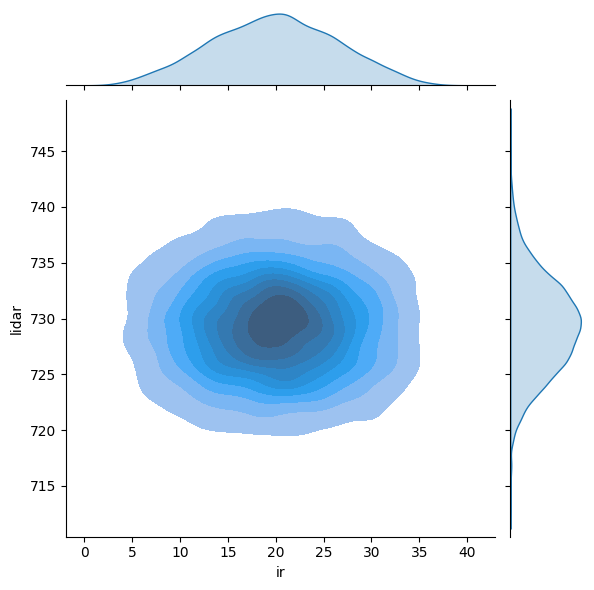

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(
    "sensor_data_700.txt",
    delimiter=" ",
    header=None,
    names=("date", "time", "ir", "lidar"),
)

d = data[(data["time"] < 160000) & (data["time"] >= 120000)]
d = d.loc[:, ["ir", "lidar"]]

sns.jointplot(data=d, x="ir", y="lidar", kind="kde", fill=True)
plt.show()

In [5]:
print("光センサの計測値の分散", d.ir.var())
print("LiDARの計測値の分散", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散:", sum(a) / (len(d) - 1))

d.mean()

光センサの計測値の分散 42.117126367701594
LiDARの計測値の分散 17.702026469211457
共分散: -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [6]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [9]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

<a list of 6 text.Text objects>

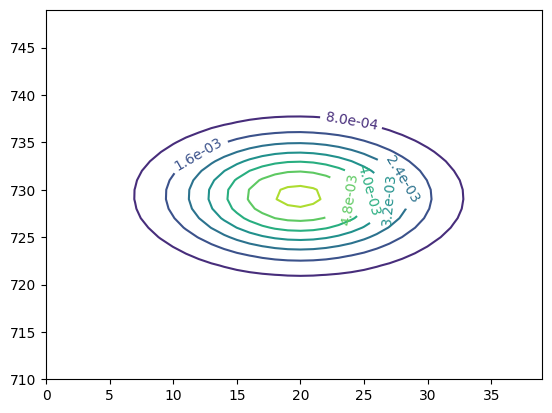

In [10]:
import numpy as np

x, y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt="%1.1e")

### 2.5.2 共分散の意味

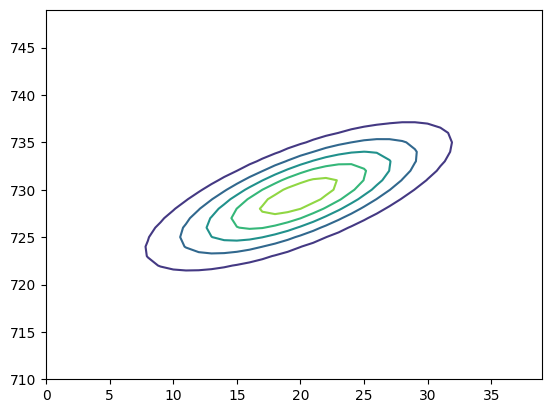

In [13]:
c = d.cov().values + np.array([[0,20],[20,0]])
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)

cont = plt.contour(x,y,tmp.pdf(pos))